In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

### Conv2D 적용하기
* Conv2D() 를 모델에 적용 시에는 반드시 입력은 배치 크기를 제외하고 3차원이 되어야 함(즉 배치를 포함하면 4차원)  

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1)) #conv2d 적용하려면 반드시 3차원으로 만들어야 한다. 마지막은 채널임. rgb면 3을 써야함.
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
#filters : 필터의 갯수는 4개다.
#kernel_size : 3*3 커널 사이즈를 적용한다.
#strides : 1칸씩 이동하겠다.
#padding : zero-padding을 적용하겠다.
#activation : 활성화함수는 relu를 적용하겠다.

print('x type:', type(x), 'x:', x)

2024-06-12 05:24:41.708135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 05:24:41.708241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 05:24:41.977209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


x type: <class 'keras.src.backend.common.keras_tensor.KerasTensor'> x: <KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_1>


### Pooling 적용하기

In [4]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

<KerasTensor shape=(None, 14, 14, 16), dtype=float32, sparse=False, name=keras_tensor_4>


### CNN 모델 생성

In [5]:
input_tensor = Input(shape=(28, 28, 1))
#param : kernel_size * depth(차원) * Layer(Filter) + bias = channels(Kernals) * Layer(Filter) * bias = 3*3*1*32 + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
#상기 출력의 차원을 보면 1차원(depth)의 커널(채널)로 구성된 레이어(필터)가 32개가 있다.
#따라서 이후 연산을 위해 차원(depth)와 커널(채널)을 다시 맞춰주어야 하는데 이를 자동으로 맞춰준다.(32로)
#param : 3*3*32*64 + 64 = 18,496
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.layers import Dense, Flatten

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야함. 
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,081,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,526 (4.20 MB)

 Trainable params: 1,101,526 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

### Fashion MNIST 데이터 전처리후 모델 학습

In [7]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [8]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
 30/399 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5085 - loss: 1.4583

I0000 00:00:1718170124.862070      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718170124.879008      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7777 - loss: 0.6355

W0000 00:00:1718170129.600089      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7779 - loss: 0.6350 - val_accuracy: 0.8828 - val_loss: 0.3351
Epoch 2/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8968 - loss: 0.2871 - val_accuracy: 0.9029 - val_loss: 0.2766
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9172 - loss: 0.2304 - val_accuracy: 0.9128 - val_loss: 0.2458
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9348 - loss: 0.1824 - val_accuracy: 0.9137 - val_loss: 0.2423
Epoch 5/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9427 - loss: 0.1560 - val_accuracy: 0.9246 - val_loss: 0.2198
Epoch 6/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9535 - loss: 0.1287 - val_accuracy: 0.9219 - val_loss: 0.2235
Epoch 7/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9597 - loss: 0.1094 - val_accuracy: 0.9256 - val_loss: 0.2332
Epoch 8/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9689 - loss: 0.0867 - val_accuracy: 0.9259 - va

### 모델 성능 평가

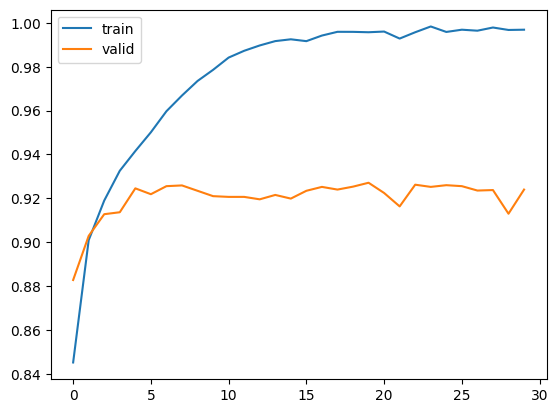

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [11]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9164 - loss: 0.6809

W0000 00:00:1718170271.300121      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9166 - loss: 0.6807


[0.6799843907356262, 0.9175999760627747]

### Dropout을 적용하여 Fully Connected Layer의 오버피팅 조정
* CNN은 일반적으로 Dense Layer보다는 파라미터수(weight 수) 작음
* 하지만 많은 Filter 들을 적용하고 이를  Fully Connected Layer로 연결 시 파라미터 수가 늘어남. 
* Flatten() 이후 Dropout을 적용하여 특정 비율로 FC Layer 연결을 누락 적용. 

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x) #50% dropout 수행
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │     1,081,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,526 (4.20 MB)

 Trainable params: 1,101,526 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
 19/399 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4430 - loss: 1.6325

W0000 00:00:1718170638.285809      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7745 - loss: 0.6486

W0000 00:00:1718170643.116999      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7747 - loss: 0.6481 - val_accuracy: 0.8793 - val_loss: 0.3327
Epoch 2/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8854 - loss: 0.3105 - val_accuracy: 0.9011 - val_loss: 0.2659
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9038 - loss: 0.2613 - val_accuracy: 0.9092 - val_loss: 0.2425
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9166 - loss: 0.2258 - val_accuracy: 0.9181 - val_loss: 0.2260
Epoch 5/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9275 - loss: 0.1972 - val_accuracy: 0.9172 - val_loss: 0.2252
Epoch 6/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9328 - loss: 0.1769 - val_accuracy: 0.9179 - val_loss: 0.2226
Epoch 7/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9416 - loss: 0.1545 - val_accuracy: 0.9246 - val_loss: 0.2077
Epoch 8/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9465 - loss: 0.1411 - val_accuracy: 0.9257 - val

33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9211 - loss: 0.4037

W0000 00:00:1718170716.745090      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9223 - loss: 0.3992


[0.3776296377182007, 0.9276999831199646]

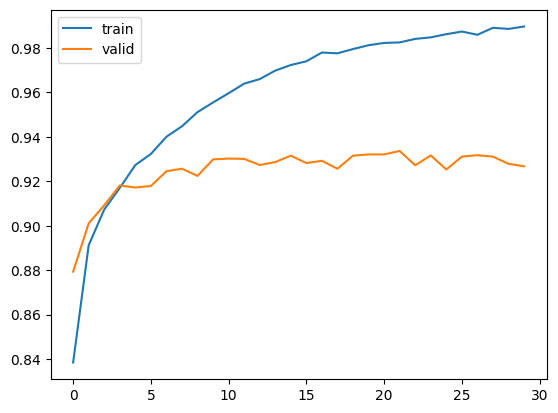

In [14]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [16]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(2)(x)

    x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    X = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

model = create_model()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │     2,163,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,184,226 (8.33 MB)

 Trainable params: 2,184,226 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7590 - loss: 0.6633

W0000 00:00:1718170784.728337      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7592 - loss: 0.6629 - val_accuracy: 0.8780 - val_loss: 0.3379
Epoch 2/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8731 - loss: 0.3487 - val_accuracy: 0.8980 - val_loss: 0.2833
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8908 - loss: 0.2934 - val_accuracy: 0.9066 - val_loss: 0.2527
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9049 - loss: 0.2613 - val_accuracy: 0.9162 - val_loss: 0.2338
Epoch 5/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9061 - loss: 0.2460 - val_accuracy: 0.9162 - val_loss: 0.2251
Epoch 6/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9178 - loss: 0.2189 - val_accuracy: 0.9189 - val_loss: 0.2161
Epoch 7/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9231 - loss: 0.2052 - val_accuracy: 0.9241 - val_loss: 0.2093
Epoch 8/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9283 - loss: 0.1878 - val_accuracy: 0.9272 - va

36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9285 - loss: 0.2465

W0000 00:00:1718170879.153424      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9287 - loss: 0.2462


[0.24288928508758545, 0.930400013923645]

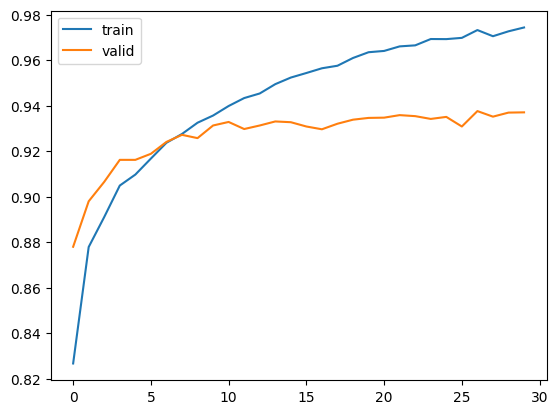

In [18]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

### 입력 이미지는 배치를 포함하여 4차원이 되어야 함(즉 배치를 제외하면 3차원)
* Conv2D()는 입력으로 배치를 제외하고 3차원 입력이 되어야 함. 
* 하지만 2차원으로 입력해도 Input(shape=(28, 28, 1)) 에서 3차원으로 변경함. 
* 명확하게는 2차원 Grayscale이미지더라도 입력 numpy 이미지 배열에서 배치를 제외한 3차원 입력을 만들어 주는게 좋음. 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('before reshape:', train_images.shape, test_images.shape)
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))
print('after reshape:', train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

In [ ]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

In [ ]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

### Stride가 1이고 Padding이 없는 경우
* I는 입력 Feature Map의 크기, F는 Filter의 크기(Kernel size), P는 Padding(정수), S는 Strides(정수)
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 0 )/1 + 1 = 3

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1)(input_tensor)
print('x.shape:', x.shape)

2024-06-12 09:07:20.981689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 09:07:20.981831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 09:07:21.148770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


x.shape: (None, 3, 3, 1)


### Stride가 1이고 Padding이 1인 경우
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 2 )/1 + 1 = 5

In [2]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=1, padding='same')(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 5, 5, 1)


In [5]:
# ZeroPadding2D Layer를 이용하여 padding을 수동으로 적용. 
from tensorflow.keras.layers import ZeroPadding2D

input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=1)(padded_input)
print('x.shape:', x.shape)


shape after padding: (None, 7, 7, 1)
x.shape: (None, 5, 5, 1)


### Stride가 2이고 Padding이 없는 경우 
* O = (I - F + 2P)/2 + 1 = (5 - 3)/2 + 1 = 2

In [6]:
input_tensor = Input(shape=(5, 5, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


### Stride가 2이고 Padding은 1 적용
* O = (I - F + 2P)/2 + 1 = (5 - 3 + 2)/2 + 1 = 3

In [7]:
input_tensor = Input(shape=(5, 5, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
print('shape after padding:', padded_input.shape)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shape:', x.shape)

shape after padding: (None, 7, 7, 1)
x.shape: (None, 3, 3, 1)


### 입력이 6X6에서 Stride가 2 적용
* O = (I - F + 2P)/2 + 1 = (6 - 3 + 0)/2 + 1 = 2.5 = 2

In [8]:
input_tensor = Input(shape=(6, 6, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 2, 2, 1)


In [9]:
input_tensor = Input(shape=(6, 6, 1))
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='same')(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


In [10]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=1)(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2, padding='valid')(padded_input)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


In [11]:
input_tensor = Input(shape=(6, 6, 1))
padded_input = ZeroPadding2D(padding=((1, 0),(1,0)))(input_tensor)
x = Conv2D(filters=1, kernel_size=3, strides=2)(padded_input)
print('x.shape:', x.shape)

x.shape: (None, 3, 3, 1)


### Maxpooling 적용

In [12]:
input_tensor = Input(shape=(223, 223, 1))
x = MaxPooling2D(2)(input_tensor)
print('x.shape:', x.shape)

x.shape: (None, 111, 111, 1)
